In [1]:
import pandas as pd

In [103]:
cols = ["Length of Vectors", "Total Instructions", "R-Type", "I-Type", "J-Type", 
        "R-Type Percentage", "I-Type Percentage", "J-Type Percentage", 
        "CPI", "ALU", "Jump", "Branch", "Memory", "Other", "Energy Consumption", "MIPS/mW"]
df = pd.DataFrame(columns=cols)

In [104]:
df.head()

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW


In [105]:
eight = [8, 346, 94, 210, 42, None, None, None, None, 227, 42, 58, 17, 2, None, None]
sixteen = [16, 990, 290, 564, 136, None, None, None, None, 651, 136, 168, 33, 2, None, None]
thirty_two = [32, 3502, 1090, 1884, 528, None, None, None, None, 2315, 528, 592, 65, 2, None, None]

In [106]:
df.loc[len(df)] = eight
df.loc[len(df)] = sixteen
df.loc[len(df)] = thirty_two

In [107]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,NaN,NaN,NaN,NaN,227.0,42.0,58.0,17.0,2.0,NaN,NaN
1,16.0,990.0,290.0,564.0,136.0,NaN,NaN,NaN,NaN,651.0,136.0,168.0,33.0,2.0,NaN,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,NaN,NaN,NaN,NaN,2315.0,528.0,592.0,65.0,2.0,NaN,NaN


In [108]:
df["R-Type Percentage"] = (df["R-Type"] / df["Total Instructions"]) 
df["I-Type Percentage"] = (df["I-Type"] / df["Total Instructions"]) 
df["J-Type Percentage"] = (df["J-Type"] / df["Total Instructions"]) 

df["CPI"] = df["R-Type Percentage"] * 2 + df["I-Type Percentage"] * 3 + df["J-Type Percentage"] * 4

In [109]:
df = df.round({"R-Type Percenage": 2, "I-Type Percentage": 2, "J-Type Percentage": 2, "CPI": 2}) 
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,NaN,NaN
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,NaN,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,NaN,NaN


In [110]:
df["Energy Consumption"] = df["ALU"] * 2 + df["Jump"] * 4 + df["Branch"] * 5 + df["Memory"] * 20 + df["Other"] * 3

In [111]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,1258.0,NaN
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,3352.0,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,11008.0,NaN


In [112]:
df["MIPS/mW"] = (df["Total Instructions"] * 10**6) / df["Energy Consumption"]

In [113]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,1258.0,275039.745628
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,3352.0,295346.062053
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,11008.0,318132.267442


In [116]:
import matplotlib.pyplot as plt

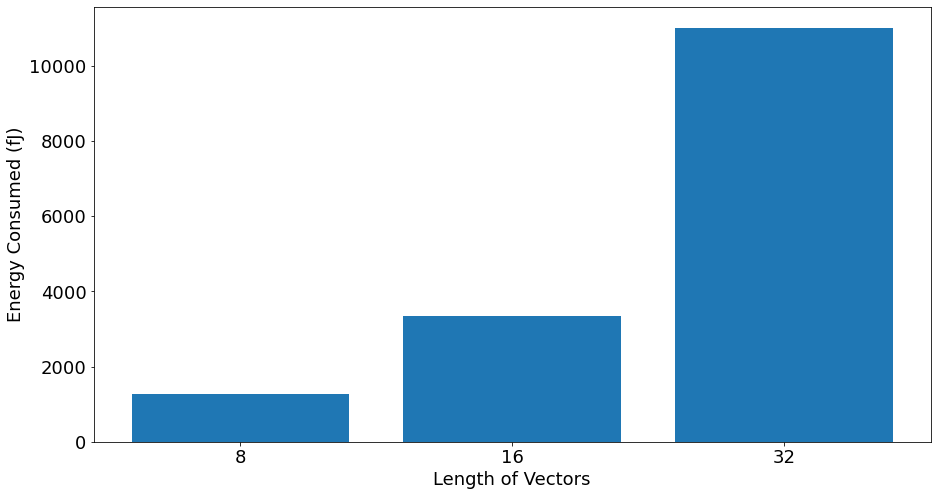

In [138]:
plt.figure(figsize=(15, 8))
plt.bar([str(int(x)) for x in df["Length of Vectors"].values.tolist()], df["Energy Consumption"])
plt.xlabel("Length of Vectors", fontdict={"fontsize": 18})
plt.ylabel("Energy Consumed (fJ)", fontdict={"fontsize": 18})
plt.tick_params(labelsize=18)
plt.savefig("Images/energy_consumption.pdf", dpi=1600)
plt.show()

In [143]:
df["Execution Time"] = df["Total Instructions"] * df["CPI"] 

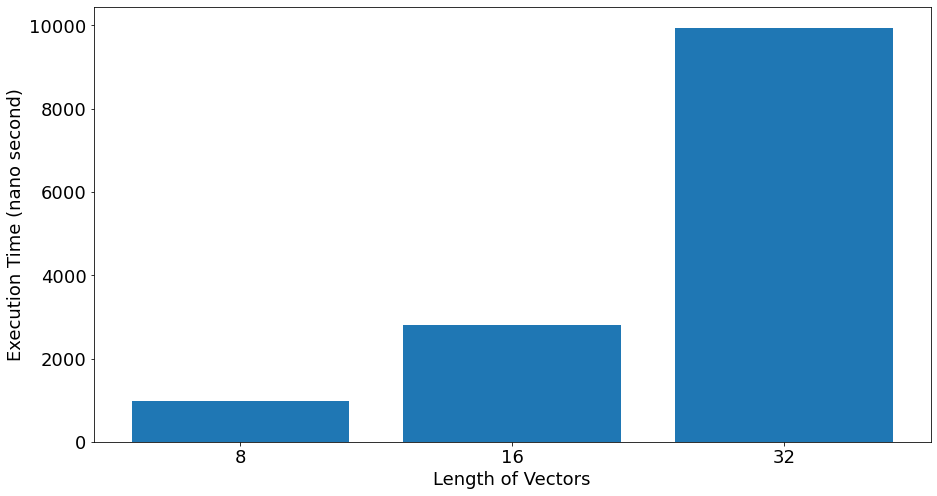

In [145]:
plt.figure(figsize=(15, 8))
plt.bar([str(int(x)) for x in df["Length of Vectors"].values.tolist()], df["Execution Time"])
plt.xlabel("Length of Vectors", fontdict={"fontsize": 18})
plt.ylabel("Execution Time (nano second)", fontdict={"fontsize": 18})
plt.tick_params(labelsize=18)
plt.savefig("Images/execution_time.pdf", dpi=1600)
plt.show()